# CHAPTER 6. 데이터 로딩과 저장 파일 형식

- 다양한 형식의 데이터 읽고 쓸 수 있는 많은 라이브러리 있음
- 이 책에서는 pandas에 초점을 맞춰 설명
- 일반적으로 입출력은 몇 가지 작은 범주로 나뉨
    - 텍스트 파일 이용하는 방법
    - 데이터베이스를 이용하는 방법
    - 웹 API를 이용해서 네트워크 통해 불러오는 방법

## 6-1. 텍스트 파일에서 데이터 읽고 쓰는 법

- pandas에는 표 형식의 자료를 DataFrame 객체로 읽어오는 몇 가지 기능 제공
- 파싱(Parsing): 어떤 페이지(문서, html 등)에서 내가 원하는 데이터를 특정 패턴이나 순서로 추출해 가공하는 것
- read_csv / read_table을 주로 사용
    - CSV(Comma-Seperated Values)
> [표 6-1] pandas 파일 파싱 함수

함수|설명|
-------|-------
read_csv|파일, URL 또는 파일과 유사한 객체로부터 구분된 데이터 읽어옴. 데이터 구분자는 쉼표(,)를 기본으로 함|
read_table|파일, URL 또는 파일과 유사한 객체로부터 구분된 데이터 읽어옴. 데이터 구분자는 탭('\t')을 기본으로 함|
read_fwf|고정폭 컬럼 형식에서 데이터 읽어옴(구분자 없는 데이터)|
read_clipboard|클립보드에 있는 데이터를 읽어오는 read_table 함수, 웹페이지에서 표 읽어올 때 유용|
read_excel|엑셀 파일(XLS, XLSX)에서 표 형식의 데이터 읽어오기|
read_hdf|pandas에서 저장한 HDFS 파일에서 데이터 읽어오기|
read_json|JSON 문자열에서 데이터 읽어오기|
read_msgpack|메시지팩 바이너리 포맷으로 인코딩된 pandas 데이터 읽어오기|
read_picle|파이썬 피클 포맷으로 저장된 객체 읽어오기|
read_sas|SAS 시스템의 사용자 정의 저장 포맷으로 저장된 데이터 읽어오기|
read_sql|SQL 쿼리 결과를 pandas의 DataFrame 형식으로 읽어오기|
read_stata|Stata 파일에서 데이터 읽어오기|
read_feather|Feather 바이너리 파일 포맷으로부터 데이터 읽어오기|

> 위 함수들은 텍스트 데이터 -> DataFrame으로 읽어오기 위한 함수. 아래의 옵션 취함
- **1. 색인**
    - 반환하는 DataFrame에서 하나 이상의 컬럼을 색인으로 지정. 파일이나 사용자로부터 컬럼 이럼을 받거나 아무것도 받지 않을 수 있음
- **2. 자료형 추론과 데이터 변환**
    - 사용자 정의 값 변환과 비어 있는 값을 위한 사용자 리스트 포함
- **3. 날짜 분석**
    - 여러 컬럼에 걸쳐 있는 날짜와 시간 정보를 하나의 컬럼에 조합해서 결과에 반영
- **4. 반복**
    - 여러 개의 파일에 걸쳐 있는 자료를 반복적으로 읽어올 수 있음
- **5. 정제되지 않은 데이터 처리**
    - 로우나 꼬리말, 주석 건너뛰기 또는 천 단위마다 쉼표로 구분된 숫자 같은 사소한 것들의 처리를 해줌

### 실제 우리가 마주하게 될 데이터?
- 엉망진창인 상태이므로 데이터를 불러오는 함수(특히 read_csv 같은)는 개발이 계속됨에 따라 복잡도가 급속도로 증가
- 넘쳐나는 함수 인자들(read_csv의 함수 인자는 현재 50개가 넘음)
- pandas 온라인 문서에는 각 인자들이 어떻게 동작하는지 다양한 예제와 함께 설명하고 있음
- [PANDAS USER GUIDE](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
- 함수들 중 일부, 예를 들어 pandas.read_csv 같은 함수들은 데이터 형식에 자료형이 포함되어 있지 않은 관계로 **타입 추론** 수행
- HDF5, Feather, msgpack의 경우에는 데이터 형식에 자료형이 포함되어 있음
- 날짜나 다른 몇 가지 사용자 정의 자료형 처리하는데 수고 필요

### 파일로부터 데이터셋을 읽어와 생성하기
- pd.read_xxxx(): xxxx 포맷
### csv 파일 등 텍스트 파일로 부터 읽어와 생성
- `pd.read_csv(파일경로, sep=',', header, index_col, na_values, encoding)`
 
    - 파일경로 : 읽어올 파일의 경로
    - sep
        - 데이터 구분자. 
        - 기본값: 쉼표
    - header=정수
        - 열이름(컬럼이름)으로 사용할 행 지정
        - 기본값: 첫번째 행
        - None 설정: 첫번째 행부터 데이터로 사용하고 header(컬럼명)는 0부터 자동증가하는 값을 붙인다.
            - 저장된 파일이 컬럼명이 없을 경우
                - header = 3일 경우, 3번째 행을 컬럼으로 지정하고 위에 1번째, 2번째 행은 날리는 것
            - header가 1번행, 2번행일 경우
                - header = 2로 설정
    - index_col=정수,컬럼명
        - index 명으로 사용할 열이름(문자열)이나 열의 순번(정수)을 지정.
        - 생략시 0부터 자동증가하는 값을 붙인다.
    - na_values
        - 읽어올 데이터셋의 값 중 결측치로 처리할 문자열 지정 ex)'모르는 값' / ?
        - NA, N/A, 빈 값 => 결측치로 자동인식
    - encoding
        - 파일 인코딩
        - 생략시 운영체제 기본 encoding 방식

In [ ]:
import pandas as pd

#### ex1.csv

- 유닉스의 cat 명령어 사용해서 파일 내용 확인(윈도우 사용자로면 cat 대신 type 명령어 사용해서 내용 확인)
- 쉼표로 구분된  CSV 파일
- (해당 파일 경로로 이동) type ex1.csv
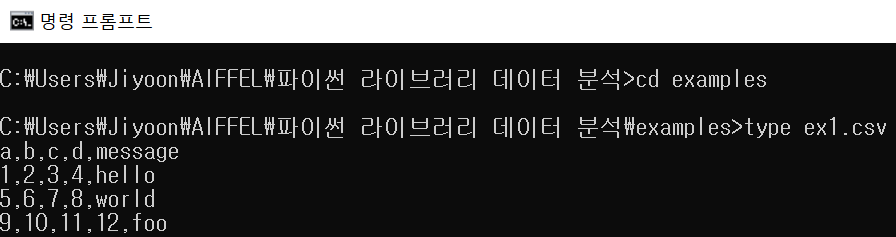

In [3]:
# CSV(Comma Seperated Version) - 쉼표로 구분되어 있어, read_csv 사용해서 DataFrame 읽어오기
df = pd.read_csv('examples/ex1.csv')

In [4]:
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [5]:
# read_table에서 구분자를 쉼표로 지정해서 읽어오기
pd.read_table('examples/ex1.csv', sep = ',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


#### ex2.csv

- 모든 파일에 컬럼 이름이 있는 건 X
- !cat examples/ex2.csv
- (해당 파일 경로로 이동) type ex2.csv
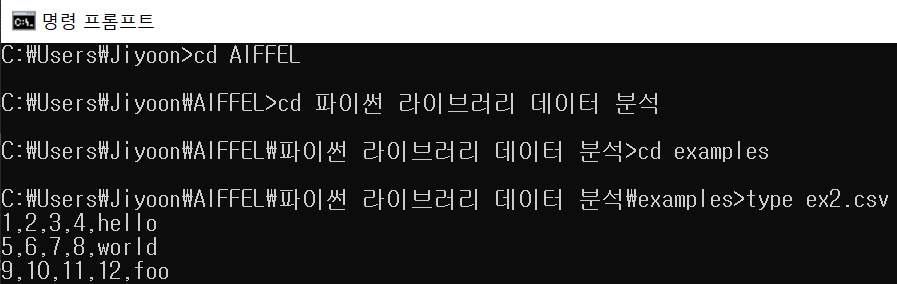

In [7]:
# 파일 읽어오는데 몇 가지 옵션 있음
# header = None: 이 파일에는 header가 없다
# pandas가 자동으로 컬럼 이름 생성하도록 함
pd.read_csv('examples/ex2.csv', header = None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [8]:
# pandas에서 우리가 직접 컬럼 이름 지정
# names에 컬럼 개수 만큼의 리스트 전달
pd.read_csv('examples/ex2.csv', names = ['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [7]:
# message 컬럼을 색인으로 하는 DataFrame을 반환하려면 index_col 인자에 4번째 컬럼 또는 'message' 이름 가진 컬럼 지정해서 색인으로 만들 수 있음
names =  [ 'a', 'b', 'c', 'd', 'message']

In [8]:
# index_col 인자에 4번째 컬럼으로 - index_col = 4
pd.read_csv('examples/ex2.csv', names = names, index_col = 4)

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [10]:
# index_col에 message 이름 가진 컬럼으로 - index_col = 'message'
pd.read_csv('examples/ex2.csv', names = names, index_col = 'message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


#### csv_mindex.csv

- !cat examples/csv_mindex.csv
- (해당 파일 경로로 이동) type csv_mindex.csv
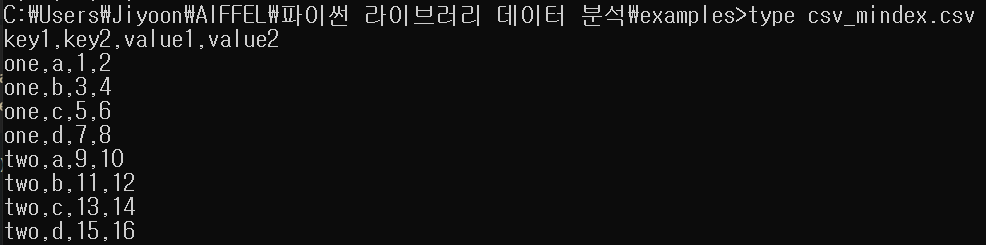

In [16]:
# 계층적 색인을 지정하고 싶다면 컬럼 번호나 이름의 리스트 남기면 됨
parsed = pd.read_csv('examples/csv_mindex.csv',
                     index_col = ['key1', 'key2'])

In [17]:
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

#### examples/ex3.txt

- !cat examples/ex3.txt
- (해당 파일 경로로 이동) type ex3.txt
- 고정된 구분자 없이 공백이나 다른 패턴으로 필드 구분해놓은 경우 있음
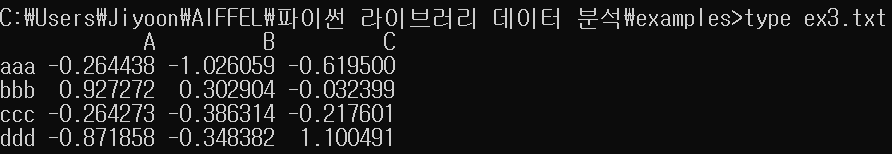

In [9]:
list(open('examples/ex3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

In [13]:
# 필드가 여러 개의 공백 문자로 구분되어 있음
# 이를 표현할 수 있는 정규 표현식 \s+ 사용해서 처리
# \s+? 1개 이상의 space를 표시하며 1개 이상의 공백 문자 의미
result = pd.read_table('examples/ex3.txt', sep = '\s+')

In [14]:
# 첫 번째 로우(A, B, C)는 다른 로우보다 컬럼이 하나 적기 때문에 read_table은 첫 번째 컬럼이 DataFrame의 색인이 되어야 한다고 추론
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


#### 정규표현식
- [참고: 정규표현식(Regex) 정리](https://hamait.tistory.com/342)
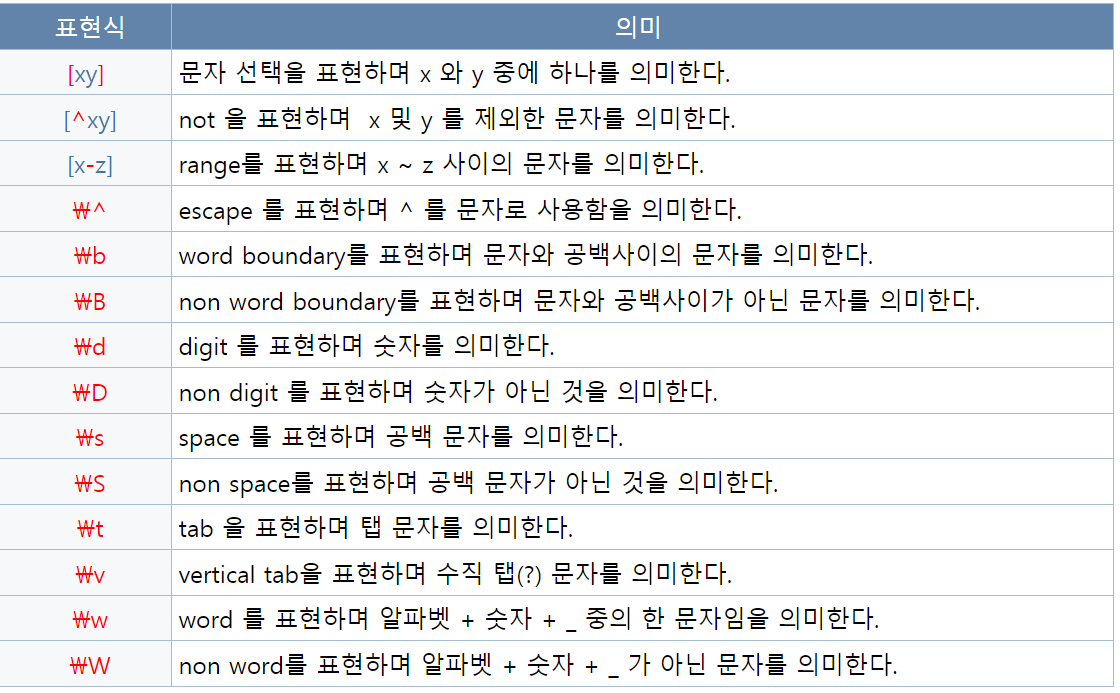

> **[표 6-2] read_csv와 read_table 함수 인자**
- 파서 함수는 파일 형식에서 발생할 수 있는 매우 다양한 예외를 잘 처리할 수 있도록 많은 추가 인자 가지고 있음

인자|설명|
-------|-------
path|파일시스템에서의 위치, URL, 파일 객체 나타내는 문자열|
sep 또는 delimiter|필드 구분하기 위해 사용할 연속된 문자나 정규 표현식|
header|컬럼 이름으로 사용할 로우 번호, 기본값은 0(첫 번째 로우)이며 헤더가 없을 경우에는 None으로 지정 가능|
index_col|색인으로 사용할 컬럼 번호나 이름. 계층적 색인을 지정할 경우 리스트 넘길 수 있음|
names|컬럼 이름으로 사용할 리스트. header = None과 함께 사용|
skprows|파일의 시작부터 무시할 행 수 또는 무시할 로우 번호가 담긴 리스트
na_values|NA 값으로 처리할 값들의 목록|
comment|주석으로 분류되어 파싱하지 않을 문자 혹은 문자열|
parse_dates|날짜를 datetime으로 변환할지 여부. 기본값은 False이며, True일 경우 모든 컬럼에 적용. 컬럼의 번호나 이름을 포함한 리스트를 넘겨셔 변환할 컬럼을 지정할 수 있는데, [1, 2, 3]을 넘기면 각각의 컬럼을 datetime으로 변환하며, [[1, 3]]을 넘기면, 1, 3번 컬럼을 조합해서 하나의 datetime으로 변환|
keep_date_col|여러 컬럼을 datetime으로 변환했을 경우, 원래 컬럼을 남겨둘지 여부. 기본값은 True|
converters|변환 시 컬럼에 적용할 함수를 지정. 예를 들어, {'foo':f}는 'foo' 컬럼에 f 함수를 적용시킴. 전달하는 사전의 키값은 컬럼 이름이나 번호가 될 수 있음|
dayfirst|모호한 날짜 형식일 경우, 국제 형식으로 간주(7/6/2012는 2012년 6월 7일로 간주). 기본값은 False|
date_parser|날짜 변환 시 사용할 함수|
nrows|파일의 첫 일부만 읽어올 때 처음 몇 줄을 읽을 것인지 지정|
iterator|파일을 조금씩 읽을 때 사용하도록 TextPerser 객체를 반환하도록 함. 기본값은 False|
chunksize|TextParser 객체에서 사용할 한 번에 읽을 파일의 크기|
skip_footer|파일의 끝에서 무시할 라인 수|
verbose|파싱 결과에 대한 정보 출력. 숫자가 아닌 값이 들어 있는 컬럼에 누락된 값이 있다면 줄 번호를 출력해줌. 기본값은 False|
encoding|유니코드 인코딩 종류를 지정. UTF-8로 인코딩된 텍스트일 경우, 'utf-8'로 지정|
sqeeze|만일 컬럼이 하나뿐이라면 Series 객체를 반환. 기본값은 False|
thousands|숫자를 천 단위로 끊을 때 사용할 ','나 '.'같은 구분자|

#### ex4.csv

- !cat examples/ex4.csv
- (해당 디렉토리로 이동) type ex4.csv
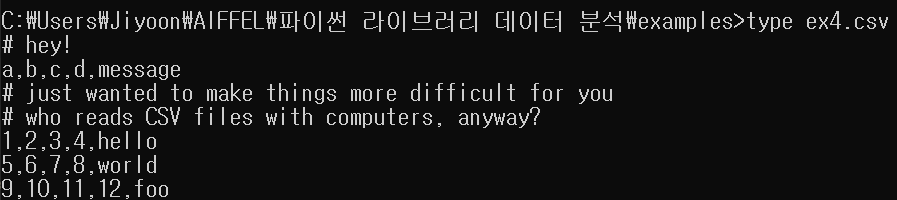

In [19]:
# skiprows를 이용해서 첫 번째, 세 번째, 네 번째 로우 건너뛸 수 있음
pd.read_csv('examples/ex4.csv', skiprows = [0,2,3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


#### ex5.csv

- !cat examples/ex5.csv
- (해당 파일 경로로 이동) type ex5.csv
- 누락된 값을 잘 처리하는 것은 파일을 읽는 과정에서 자주 발생하는 일
- 보통 텍스트 파일에서 누락된 값은 표기되지 않거나(비어 있는 문자열) 구분하기 쉬운 특수안 문자로 표기
- 기본적으로 pandas는 NA나 NULL처럼 흔히 통용되는 문자를 비어 있는 값으로 사용
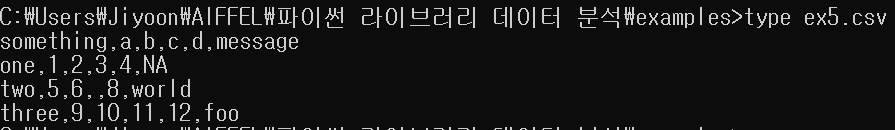

In [11]:
result = pd.read_csv('examples/ex5.csv')

In [13]:
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [14]:
# Null 여부를 True/False로 반환
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [105]:
# na_values: 리스트나 문자열 집합을 받아서 누락된 값을 처리
# na_values = ['NULL'] - 리스트 안에 있는 값을 결측치로 인식해라
# 위에 조회한 것과 차이가 없다? na_values = ['foo'] 해보기
result = pd.read_csv('examples/ex5.csv', na_values = ['NULL'])

In [95]:
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


In [94]:
result = pd.read_csv('examples/ex5.csv', na_values = ['foo'])
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


In [107]:
# 컬럼마다 다른 NA 문자를 사전값으로 넘겨서 처리할 수 있음
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}

In [108]:
pd.read_csv('examples/ex5.csv', na_values = sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


### 6.1.1 텍스트 파일 조금씩 읽어오기

- 매우 큰 파일을 처리할 때, 인자를 제대로 주었는지 알아보기 위해 파일의 일부분만 읽어보거나 여러 파일 중에서 몇 개의 파일만 읽어서 확인

#### ex6.csv

- 10000 rows x 5 columns
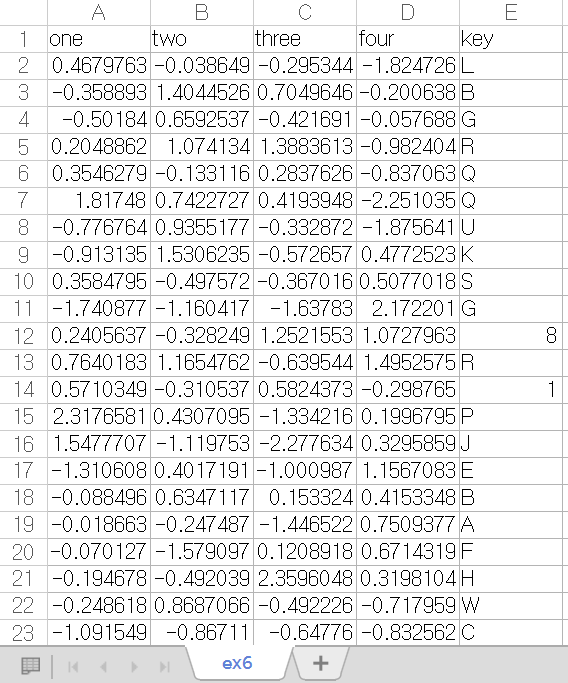

In [109]:
# 최대 10개의 데이터만 출력
pd.options.display.max_rows = 10

In [110]:
result = pd.read_csv('examples/ex6.csv')

In [111]:
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [24]:
# 파일 전체를 읽는 대신 처음 몇 줄만 읽어보고 싶을 때
# nrows 옵션 - nrows = 5
pd.read_csv('examples/ex6.csv', nrows = 5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [27]:
# head() - 상위 5개 행을 조회
ex6 = pd.read_csv('examples/ex6.csv')
ex6.head()

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [30]:
ex6.head(7)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
5,1.817480,0.742273,0.419395,-2.251035,Q
6,-0.776764,0.935518,-0.332872,-1.875641,U


In [28]:
# 하위 5개 행을 조회
ex6.tail()

,one,two,three,four,key
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G
9999,-0.096376,-1.012999,-0.657431,-0.573315,0


In [31]:
ex6.tail(8)

,one,two,three,four,key
9992,0.301214,-1.111203,0.668258,0.671922,A
9993,1.821117,0.416445,0.173874,0.505118,X
9994,0.068804,1.322759,0.802346,0.223618,H
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G
9999,-0.096376,-1.012999,-0.657431,-0.573315,0


In [32]:
# 파일을 여러 조각으로 나누어서 일고 싶을때
# chunksize 옵션으로 로우의 개수 지정
chunker = pd.read_csv('examples/ex6.csv', chunksize = 1000)

In [34]:
chunker, type(chunker)

(<pandas.io.parsers.TextFileReader at 0x149192e6b48>,
 pandas.io.parsers.TextFileReader)

In [36]:
# read_csv에서 반환된 TextParser 객체를 이용해 chunksize에 따라 분리된 파일들을 순회
# 예를 들어, ex6.csv 파일을 순회하면서 'key' 로우에 있는 값을 세어보기
chunker = pd.read_csv('examples/ex6.csv', chunksize = 1000)

tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value = 0)
    
tot = tot.sort_values(ascending = False)

C:\Users\Jiyoon\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


In [38]:
tot[:10]

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

In [113]:
tot

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
     ...  
5    157.0
2    152.0
0    151.0
9    150.0
1    146.0
Length: 36, dtype: float64

In [117]:
tot_df = pd.DataFrame(tot)
tot_df.tail(10)

,0
4,171.0
6,166.0
7,164.0
8,162.0
3,162.0
5,157.0
2,152.0
0,151.0
9,150.0
1,146.0


### 6.1.2 데이터를 텍스트 형식으로 기록하기

- 읽어오기와 마찬가지로 데이터를 구분자로 구분한 형식으로 내보내는 것도 가능

#### ex5.csv

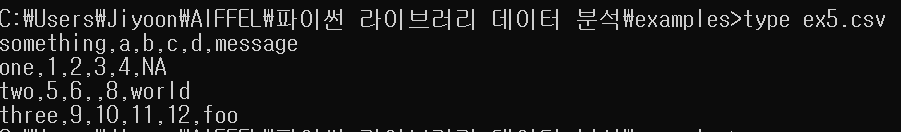

In [43]:
data = pd.read_csv('examples/ex5.csv')

In [44]:
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [45]:
# DataFrame의 to_csv 메서드 이용하여 데이터를 쉼표로 구분된 형식으로 파일에 쓸 수 있음
data.to_csv('examples/out.csv')

#### out.csv

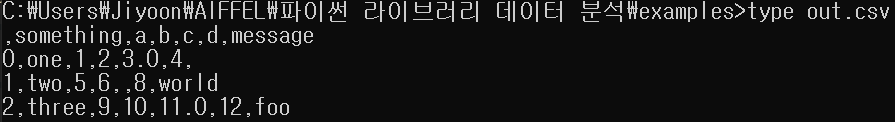

#### sys - 시스템 특정 파라미터와 함수
- [참고. sys - 시스템 특정 파라미터와 함수](https://docs.python.org/ko/3/library/sys.html)
- sys.stdout
    - 일반적으로 Python에서 문자열 출력시 print문 사용
    - 하지만, print문은 자동으로 개행이 되기 때문에 여러 줄의 문자열 출력 시 불편함
    - stdout은 print()와 표현식 문장의 출력과 input()의 프롬프트에 사용됨

In [46]:
# 다른 구분자도 사용 가능
# 콘솔에서 확인할 수 있도록 실제 파일로 기록하지 않고 sys.stdout에 결과를 기록
import sys

In [47]:
data.to_csv(sys.stdout, sep = '|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [48]:
# 결과에서 누락된 값은 비어 있는 문자열로 나타나는데, 이것 역시 원하는 값으로 지정 가능
# 결측치를 원하는 문자열로 대체(여기서는 NULL)
data.to_csv(sys.stdout, na_rep = 'NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [49]:
# 로우와 컬럼 이름을 포함하지 않고 싶을때
data.to_csv(sys.stdout, index = False, header = False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [50]:
# 컬럼의 일부분만 기록할 수도 있으며, 순서를 직접 지정할 수 있음
data.to_csv(sys.stdout, index = False, columns = ['a', 'b', 'c'])

a,b,c
1,2,3.0
5,6,
9,10,11.0


#### date_range 함수
- [참고. pd.date_range 함수 알아보기](https://workingwithpython.com/date_range/)
- 매개변수
    - start: 시작 날짜
    - end: 종료 날짜
    - freq: frequency를 설정. ex) B - Business day freqnency, D - Calendar day frequency
        - [참고. freq 매개변수에 사용되는 Frequency strings](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)
    - Periods: date_range 함수에 전달된 시작날짜와 종료날짜를 periods 매개분수에 전달된 기간만큼 동일하게 나누어 출력

In [55]:
# date_range 함수 예시
# 10일 -> 총 240시간 / 5 -> 36시간별로 분기
pd.date_range(start = '2020-10-10', end = '2020-10-20', periods = 5)

DatetimeIndex(['2020-10-10 00:00:00', '2020-10-12 12:00:00',
               '2020-10-15 00:00:00', '2020-10-17 12:00:00',
               '2020-10-20 00:00:00'],
              dtype='datetime64[ns]', freq=None)

#### tseries.csv

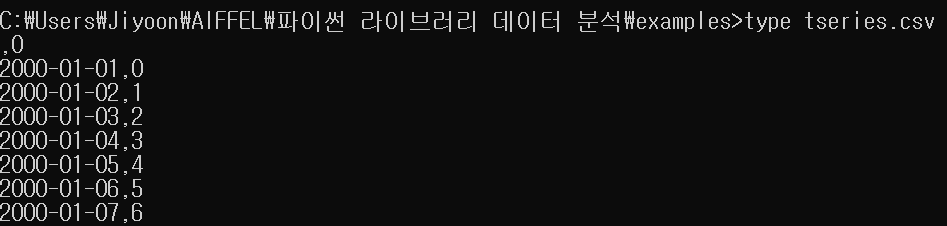

In [51]:
# Series에도 to_csv 메서드가 존재
# periods - 날짜 범위
dates = pd.date_range('1/1/2000', periods = 7)

In [118]:
import numpy as np
ts = pd.Series(np.arange(7), index = dates)

In [119]:
ts.to_csv('examples/tseries.csv')

### 6.1.3 구분자 형식 다루기

- pandas_read_table 함수를 이용해서 디스크에 표 형태로 저장된 대부분의 파일 형식을 불러올 수 있음
- 하지만, 수동으로 처리해야 하는 경우도 있음
- read_table 함수가 데이터를 불러오는데 실패하게끔 만드는 잘못된 라인이 포함되어 있는 데이터를 전달받는 경우도 종종 있음

#### ex7.csv

- !cat examples/ex7.csv
- (해당 파일 경로로 이동) type ex7.csv
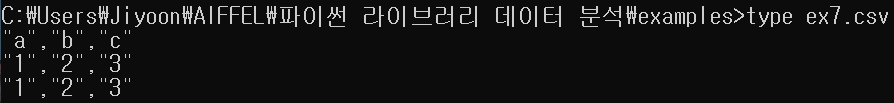

In [122]:
# 구분자가 한 글자인 파일은 파이썬 내장 csv 모듈을 이용해서 처리할 수 있음
# 열려진 파일 객체를 csv.reader 함수에 넘기기만 하면 됨
import csv
f = open('examples/ex7.csv')

reader = csv.reader(f)

In [124]:
# 파일을 읽듯이 reader를 순회하며 둘러싸고 있든 큰따옴표가 제거된 튜플 얻을 수 있음
for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [153]:
# 원하는 형태로 데이터 넣기
# 먼저, 파일 읽어 줄 단위 리스트로 저장
with open('examples/ex7.csv') as f:
    lines = list(csv.reader(f))

In [134]:
lines

[['a', 'b', 'c'], ['1', '2', '3'], ['1', '2', '3']]

In [126]:
# 헤더와 데이터를 구분
header, values = lines[0], lines[1:]

In [127]:
# 사전 표기법과 로우를 컬럼으로 전치해주는 zip(*values)를 이용해서 데이터 컬럼 사전 만들기
data_dict = {h: v for h, v in zip(header, zip(*values))}

In [128]:
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

In [156]:
# CSV 파일은 다양한 형태로 존재할 수 있음
# 다양한 구분자, 문자열을 둘러싸는 방법, 개행 문자 같은 것들은 csv.Dialiect를 상속받아 새로운 클래스 정의해서 해결할 수 있음
class my_dialect(csv.Dialect):
    lineterminator = '\n'
    delimiter = ';'
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL

with open('examples/ex7.csv') as f:
    reader = csv.reader(f, dialect = my_dialect)

In [97]:
f

<_io.TextIOWrapper name='mydata.csv' mode='w' encoding='cp949'>

In [96]:
# class my_dialect(csv.Dialect):
#     lineterminator = '\n'
#     delimiter = ';'
#     quotechar = '"'
#     quoting = csv.QUOTE_MINIMAL
# reader = csv.reader(f, dialect = my_dialect)

TypeError: argument 1 must be an iterator

In [149]:
# 서브클래스를 정의하지 않고, csv.reader에 키워드 인자로 각각의 CSV 파일의 특징을 지정해서 전달해도 됨
with open('examples/ex7.csv') as f:
    reader = csv.reader(f, delimiter = '|')

In [160]:
# reader = csv.reader(f, delimiter = '|')

> **[표 6-3] CSV 관련 옵션**
- 더 복잡하거나 구분자가 한 글자를 초과하는 고정 길이를 가진다면 csv 모듈 사용할 수 없음
- 이 경우, 줄을 나누고 문자열의 split 메서드나 정규 표현식 메서드인 re.split 등을 이용해서 가공하는 작업 필요

인자|설명|
-------|------|
delimiter|필드를 구분하기 위한 한 문자로 된 구분자. 기본값은 ','|
lineterminator|파일을 저장할 때 사용할 개행 문자. 기본값은 '\r\n'. 파일을 읽을 때는 이 값을 무시하며, 잦동으로 플랫폼별 개행 문자를 인식|
quotechar|각 필드에서 값을 둘러싸고 있는 문자. 기본값은 '"'|
quoting|값을 읽거나 쓸 때 둘러쌀 문자 컨벤션. csv.QUOTE_ALL(모든 필드에 적용). csv.QUOTE_MINIMAL(구분자 같은 특별한 문자가 포함된 필드만 적용). csv.QUOTE_NONE(값을 둘러싸지 않음) 옵션이 있음. 자세한 내용은 파이썬 문서 참고. 기본값은 QUOTE_MINIMAL|
skipinitialspace|구분자 뒤에 있는 공백 문자를 무시할지 여부. 기본값은 False|
doublequote|값을 둘러싸는 문자가 필드 내에 존재할 경우 처리 여부. True일 경우 그 문자까지 모두 둘러쌈. 자세한 내용은 온라인 문서를 참고. http://docs.python.org/2/library/csv.html|
escapechar|quoting이 csv.QUOTE_NONE일 때, 값에 구분자와 같은 문자가 있을 경우 구별할 수 있도록 해주는 이스케이프 문자(' \ ' 같은). 기본값은 None||

In [150]:
# CSV처럼 구분자로 구분된 파일을 기록하려면 csv.writer 이용
# csv.writer는 이미 열린, 쓰기가 가능한 파일 객체를 받아서 csv.reader와 동일한 옵션으로 파일을 기록
with open('mydata.csv', 'w') as f:
    writer = csv.writer(f, dialect = my_dialect)
    writer.writerow(('one', 'two', 'three'))
    writer.writerow(('1', '2', '3'))
    writer.writerow(('4', '5', '6'))
    writer.writerow(('7', '8', '9'))

In [151]:
mydata_df = pd.read_csv('mydata.csv')
mydata_df

,one;two;three
0,1;2;3
1,4;5;6
2,7;8;9


### 6.1.4 JSON 데이터
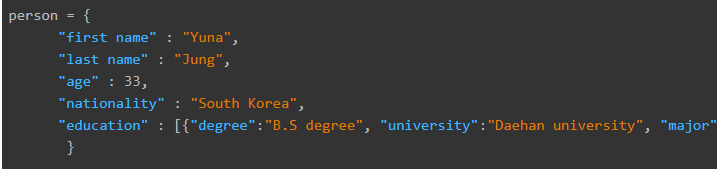
- JSON(JavaScript Object Notation): 웹브라우저와 다른 애플리케이션이 HTTP 요청으로 데이터를 보낼 때 널리 사용하는 표준 파일 형식 중 하나
- JavaScript의 데이터 객체 표현 방식(파이썬 dictionary 타입과 매우 유사한 구조)
- JSON은 CSV 같은 표 형식의 텍스트보다 좀 더 유연한 데이터 형식
- JSON은 널값 null과 다른 몇 가지 미묘한 차이(리스트의 마지막에 쉼표가 있으면 안 되는 등)를 제외하면 파이썬 코드와 거의 유사
- 기본 자료형은 객체(사전), 배열(리스트), 문자열, 숫자, 불리언, 그리고 널
- 객체의 키는 반드시 문자열이어야 함
- JSON 데이터 읽고 쓸 수 있는 파이썬 표준 라이브러리인 json 사용
- JSON 문자열을 파이썬 형태로 변환하기 위해서는 json.loads 사용

In [61]:
# 라이브러리 import
import json

In [141]:
# JSON 데이터 예시
obj = """
{"name": "Wes",
"places_lived": ["United States", "Spain", "Germany"],
"pet": null,
"siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
             {"name": "Katie", "age": 38,
             "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

In [142]:
# JSON 문자열을 파이썬 형태로 변환하기 위한 절차
result = json.loads(obj)

In [144]:
result, type(result)

({'name': 'Wes',
  'places_lived': ['United States', 'Spain', 'Germany'],
  'pet': None,
  'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
   {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]},
 dict)

In [145]:
# json.dumps는 파이썬 객체를 JSON 형태로 변환
asjson = json.dumps(result)

In [146]:
asjson, type(asjson)

('{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]}',
 str)

In [85]:
# JSON 객체나 객체의 리스트를 DataFrame이나 다른 자료구조로 변환
# JSON 객체의 리스트를 사전에 담고 있는 리스트로 변환하여 DataFrame 생성자로 넘기고 데이터 필드 선택할 수 있음
siblings = pd.DataFrame(result['siblings'], columns = ['name', 'age'])

In [86]:
siblings

,name,age
0,Scott,30
1,Katie,38


#### example.json

- !cat examples/example.json
- (해당 파일 경로로 이동) type example.json
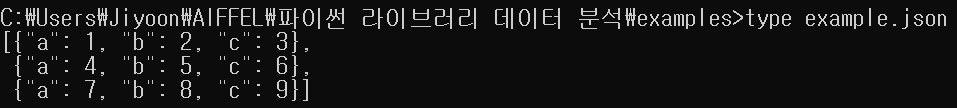

In [87]:
# pandas.read_json은 자동으로 JSON 데이터셋을 Series나 DataFrame으로 변환
# 별다른 옵션이 주어지지 않았을 경우, pandas.read_json은 JSON 배열에 담긴 각 객체를 테이블의 로우로 간주
data = pd.read_json('examples/example.json')

In [88]:
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


#### DataFrame을 JSON 파일로 저장
- [참고.DataFrame을 JSON 파일로 저장](https://moon9342.github.io/data-science-lecture-python-pandas-dataframe-basic)
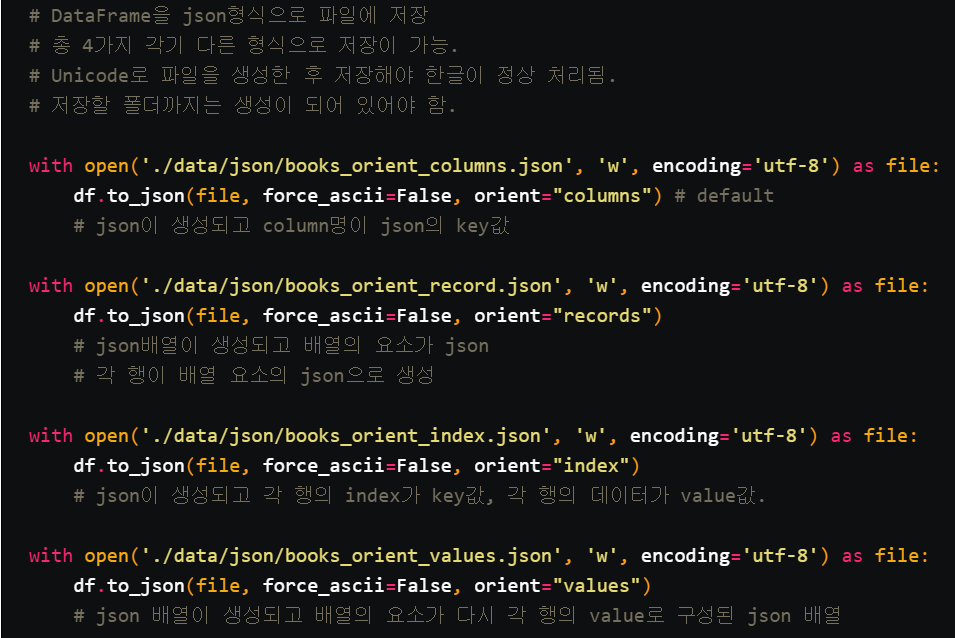

In [89]:
# pandas의 데이터를 JSON으로 저장하는 1가지 방법
# Series나 DataFrame의 to_json 함수 이용
# Default - orient = 'columns'
# json이 생성되고 column명이 json의 키값
print(data.to_json())

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}


In [90]:
# json 배열이 생성되고 배열의 요소가 json
# 각 행이 배열 요소의 json으로 생성
print(data.to_json(orient = 'records'))

[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


In [91]:
# json 배열이 생성되고, 배열의 요소가 다시 각 행의 value로 구성된 json 배열
print(data.to_json(orient = 'values'))

[[1,2,3],[4,5,6],[7,8,9]]


In [92]:
# json이 생성되고 각 행의 index가 key값
# 각 행의 데이터가 value값
print(data.to_json(orient = 'index'))

{"0":{"a":1,"b":2,"c":3},"1":{"a":4,"b":5,"c":6},"2":{"a":7,"b":8,"c":9}}


### 6.1.5 XML과 HTML: 웹 스크래핑
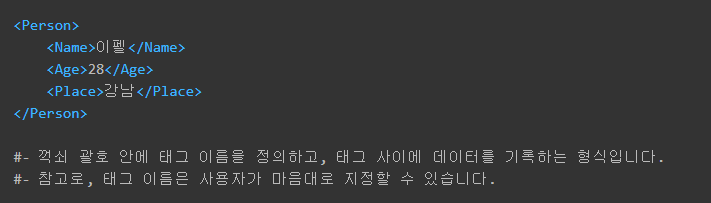
- 파이썬에는 lxml, Beautiful Soup(뷰티플 수프), html5lib과 같은 HTML과 XML 형식의 데이터 읽고 쓸 수 있는 라이브러리 무척 많음
    - [lxml 4.6.3](https://pypi.org/project/lxml/)
    - [beautifulsoup4 4.9.3](https://pypi.org/project/beautifulsoup4/)
    - [html5lib 1.1](https://pypi.org/project/html5lib/)
- 그중에서도 lxml은 가장 빠르게 동작하고 깨진 HTML과 XML 파일도 잘 처리해줌
- pandas에는 read_html이라는 내장 함수 있음
    - lxml이나 Beautiful Soup 같은 라이브러리를 사용해서 자동으로 HTML 파일을 피싱하여 DataFrame으로 변환해줌
    - 사용법 알아보기 위해, 미연방예금보험공사(FDIC)에서 부도은행 보여주는 HTML 다운로드
    - read_html 사용하기 위해 아래 라이브러리 설치
      ```python
      conda install lxml
      conda install beautifulsoup4 html5lib
     ```
        

In [94]:
# 패키지 설치
!pip install lxml
!pip install beautifulsoup4 html5lib

In [161]:
# pandas.read_html 함수에는 다양한 옵션 있음
# 기본적으로 <table> 태그 안에 있는 모든 표 형식의 데이터 파싱 시도
# 결과는 DataFrame 객체의 리스트에 저장됨
tables = pd.read_html('examples/fdic_Failed_bank_list.html')

In [162]:
tables

[                             Bank Name             City  ST   CERT  \
 0                          Allied Bank         Mulberry  AR     91   
 1         The Woodbury Banking Company         Woodbury  GA  11297   
 2               First CornerStone Bank  King of Prussia  PA  35312   
 3                   Trust Company Bank          Memphis  TN   9956   
 4           North Milwaukee State Bank        Milwaukee  WI  20364   
 ..                                 ...              ...  ..    ...   
 542                 Superior Bank, FSB         Hinsdale  IL  32646   
 543                Malta National Bank            Malta  OH   6629   
 544    First Alliance Bank & Trust Co.       Manchester  NH  34264   
 545  National State Bank of Metropolis       Metropolis  IL   3815   
 546                   Bank of Honolulu         Honolulu  HI  21029   
 
                    Acquiring Institution        Closing Date  \
 0                           Today's Bank  September 23, 2016   
 1              

In [163]:
len(tables)

1

In [164]:
failures = tables[0]

In [165]:
# 5개 행만 조회
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


In [167]:
# 데이터 정제와 연도별 부도은행 수 계산 등의 분석 시작할 수 있음
# 'Closing Date'컬럼 바탕으로 폐점시점 관련 DF 만들기
close_timestamps = pd.to_datetime(failures['Closing Date'])

In [168]:
close_timestamps

0     2016-09-23
1     2016-08-19
2     2016-05-06
3     2016-04-29
4     2016-03-11
         ...    
542   2001-07-27
543   2001-05-03
544   2001-02-02
545   2000-12-14
546   2000-10-13
Name: Closing Date, Length: 547, dtype: datetime64[ns]

#### Pandas의 날짜 함수
- [참고.Pandas의 날짜 함수](https://truman.tistory.com/97)
- import datetime

1. 현재 날짜, 시간 출력
```python
datetime.datetime.now()
pd.datetime.now()
```

2. timestamp 형식으로 출력
```python
pd.Timestamp.now()
pd.Timestamp.today()
```

3. Series와 날짜함수
```python
Series(pd.datetime.now()).dt.year
Series(pd.datetime.now()).dt.weekday
Series(pd.datetime.now()).dt.quarter
```

In [169]:
# 연도별 은행 폐점 개수 조회
# value_counts(): 고유한 값의 빈도수 조회
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
       ... 
2004      4
2001      4
2007      3
2003      3
2000      2
Name: Closing Date, Length: 15, dtype: int64

#### lxml.objectify를 이용해서 XML 파싱하기
- XML(eXtensible Markup Language)은 계층적 구조와 메타데이터 포함하는 중첩된 데이터 구조를 지원하는 또 다른 유명한 데이터 형식
- XML vs HTML
    - 구조적으로 유사하지만, XML이 더 범용적
- lxml 이용해서 XML 형식에서 데이터 파싱하는 방법
    - 사용 데이터? 뉴욕 MTA(Metropolitan Transportation Authority)는 버스와 전철 운영에 관한 여러 가지 데이터 공개
    - 살펴볼 것은 여러 XML 파일로 제공되는 실적 자료
    - 전철과 버스 운영은 매월 다음과 비슷한 내용의 각기 다른 파일(Metro-North Railroad의 경우 Performance_MNR.xml)로 제공
    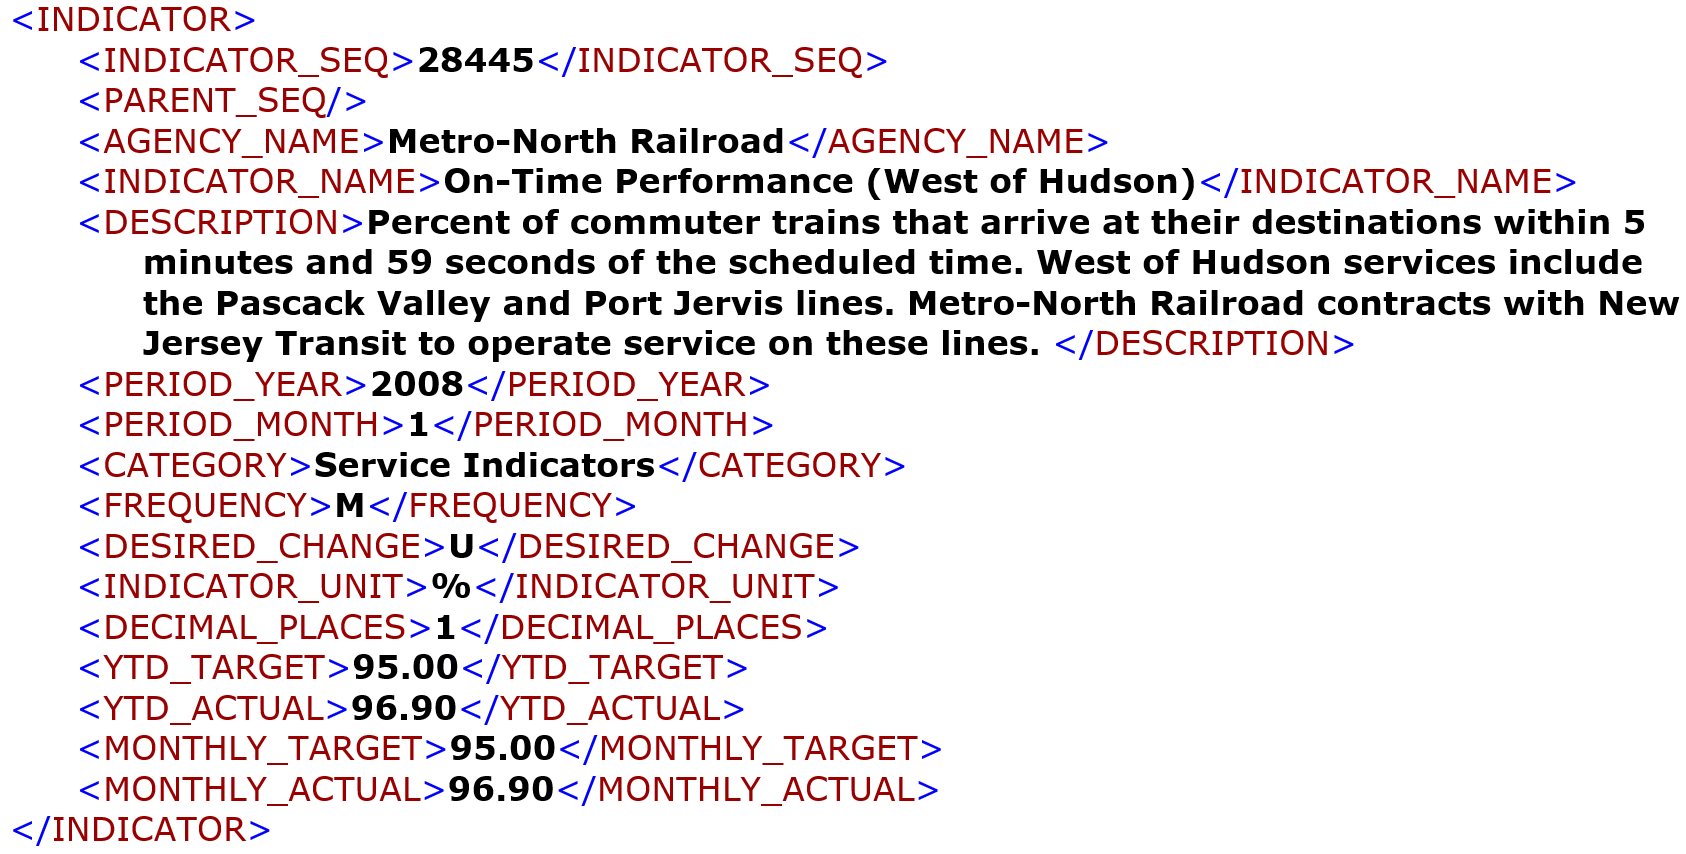

In [170]:
# lxml.objectify 이용해서 파일 파싱한 후, getroot 함수 이용해서 XML 파일의 루트 노드에 대한 참조 얻어오기
from lxml import objectify

path = 'examples/mta_perf/Performance_MNR.xml'
parsed = objectify.parse(open(path))

# root.INDICATOR 이용해서 모든 <indicator> XML 엘리먼트 끄집어낼 수 있음
# 각각의 항목에 대해 몇몇 태그는 제외하고, 태그 이름(YTD_ACTUAL 같은)을 키값으로 하는 사전 만들어낼 수 있음
root = parsed.getroot()

In [176]:
type(root.INDICATOR)

lxml.objectify.ObjectifiedElement

In [171]:
data = []

skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ', 'DESIRED_CHANGE', 'DECIMAL_PLACES']

for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)

In [34]:
# 위에 사전 리스트를 DataFrame으로 변환
perf = pd.DataFrame(data)

In [35]:
perf.head()

,AGENCY_NAME,INDICATOR_NAME,DESCRIPTION,PERIOD_YEAR,PERIOD_MONTH,CATEGORY,FREQUENCY,INDICATOR_UNIT,YTD_TARGET,YTD_ACTUAL,MONTHLY_TARGET,MONTHLY_ACTUAL
0,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,%,95,96.9,95,96.9
1,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,2,Service Indicators,M,%,95,96,95,95
2,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,3,Service Indicators,M,%,95,96.3,95,96.9
3,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,4,Service Indicators,M,%,95,96.8,95,98.3
4,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,5,Service Indicators,M,%,95,96.6,95,95.8


In [37]:
# XML 데이터 얻기? 본 예제보다 훨씬 더 복잡한 과정 거쳐야 함
# 각각의 태그 또한 메타데이터 가지고 있을 수 있음
# STRING IO 클래스는 문자열을 파일 객체처럼 다룰 있게 해주는 클래스
# 유효한 XML 형식인 HTML의 <a> 태그 생각하면 됨
# <a> 태그는 하나의 페이지에서 다른 페이지로 연결할 때 사용하는 하이퍼링크 정의할 때 사용
# href - hypertext reference
from io import StringIO
tag = '<a href = "http://www.google.com">Google</a>'
root = objectify.parse(StringIO(tag)).getroot()

In [38]:
# 태그나 링크 이름에서 어떤 필드(href 같은)라도 접근 가능
root

<Element a at 0x21a4534bf08>

In [39]:
root.get('href')

'http://www.google.com'

In [40]:
root.text

'Google'